[Imbalanced-learn](https://imbalanced-learn.org/stable/) (imported as imblearn) is an open source, MIT-licensed library relying on scikit-learn (imported as sklearn) and provides tools when dealing with classification with imbalanced classes.

In [1]:
! pip install imbalanced-learn

# About Dataset

Digital payments are evolving, but so are cyber criminals.

According to the Data Breach Index, more than 5 million records are being stolen on a daily basis, a concerning statistic that shows - fraud is still very common both for Card-Present and Card-not Present type of payments.

In today’s digital world where trillions of Card transaction happens per day, detection of fraud is challenging.

This Dataset sourced by some unnamed institute.

Feature Explanation:

- `distancefromhome` - the distance from home where the transaction happened.

- `distancefromlast_transaction` - the distance from last transaction happened.

- `ratiotomedianpurchaseprice` - Ratio of purchased price transaction to median purchase price.

- `repeat_retailer` - Is the transaction happened from same retailer.

- `used_chip` - Is the transaction through chip (credit card).

- `usedpinnumber` - Is the transaction happened by using PIN number.

- `online_order` - Is the transaction an online order.

- `fraud` - Is the transaction fraudulent.





https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('_data/card_transdata.csv')

In [3]:
data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


In [4]:
data['repeat_retailer'] = data['repeat_retailer'].values.astype(bool)
data['used_chip'] = data['used_chip'].values.astype(bool)
data['used_pin_number'] = data['used_pin_number'].values.astype(bool)
data['online_order'] = data['online_order'].values.astype(bool)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  bool   
 4   used_chip                       1000000 non-null  bool   
 5   used_pin_number                 1000000 non-null  bool   
 6   online_order                    1000000 non-null  bool   
 7   fraud                           1000000 non-null  float64
dtypes: bool(4), float64(4)
memory usage: 34.3 MB


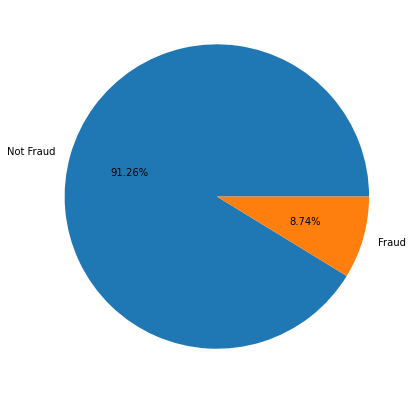

In [6]:
plt.figure(figsize=(7, 7))
plt.pie([data[data['fraud'] == 0].shape[0],
         data[data['fraud'] == 1].shape[0]],
        labels=['Not Fraud', 'Fraud'], autopct='%1.2f%%');

In [7]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import RandomOverSampler as ROS
from imblearn.under_sampling import RandomUnderSampler as RUS

In [8]:
X = data.drop(columns=['fraud'])
y = data['fraud']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700000, 7), (300000, 7), (700000,), (300000,))

In [11]:
X_train[y_train==1].shape[0]/X_train[y_train==0].shape[0]

0.09578061845858106

In [12]:
ros = ROS(sampling_strategy=.7)
rus = RUS(sampling_strategy=.7)
smo = SMOTE(sampling_strategy=.7)

In [13]:
X_t_ros, y_t_ros = ros.fit_resample(X_train, y_train)
X_t_rus, y_t_rus = rus.fit_resample(X_train, y_train)
X_t_smo, y_t_smo = smo.fit_resample(X_train, y_train)

In [14]:
X_t_ros[y_t_ros==1].shape[0]/X_t_ros[y_t_ros==0].shape[0]

0.6999987476792932

In [15]:
X_t_rus[y_t_rus==1].shape[0]/X_t_rus[y_t_rus==0].shape[0]

0.7000045762401611

In [16]:
X_t_smo[y_t_smo==1].shape[0]/X_t_smo[y_t_smo==0].shape[0]

0.6999987476792932

In [21]:
X_t_smo['repeat_retailer'].shape

(1085983,)

In [20]:
y_t_smo.shape

(1085983,)

# Try yourself:

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud